# Database II Project
## by Lou GOBIN, Théo JAOUDET and Cédric DELRIEUX
### Link of the GitHub with all the datasets files : https://github.com/tatouti/DatabasePD
### Link of the dataset Erasmus Mobility : https://www.kaggle.com/datasets/donjoeml/erasmus-mobility-statistics-2014-2019/data
### Link of the dataset Global Cost of Living : https://www.kaggle.com/datasets/mvieira101/global-cost-of-living
### Link of the World University Rankings : https://www.kaggle.com/datasets/r1chardson/the-world-university-rankings-2011-2023

### Introduction to Erasmus +
Expliquer ce qu'est Erasmus+ en qlq phrases
### Data description : (Expliquer en une ligne chaque dataset)
1. **Erasmus Mobility** :
2. **Global Cost of Living** : 
3. **World University Ranking** : 

### Objectives of this Data Analysis : 
(Expliquer le but recherché)


## I. Start of the Data Processing

### Import of the libraries 

In [1]:
# Pandas for data processing 
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

# Library for numpy
import numpy as np
from numpy import random

# Library to get countries codes
import pycountry

# Regex for string values
import re

# Library to read zip file
import zipfile

# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Loading and cleaning of the first dataset  -> Erasmus Mobility Statistics

In [2]:
#erasmus_df = pd.read_csv("Erasmus_mobility_statistics_2014_2019.csv",sep=',',low_memory=False)
zf = zipfile.ZipFile('Erasmus_mobility_statistics_2014_2019.zip') 
erasmus_df = pd.read_csv(zf.open('Erasmus_mobility_statistics_2014_2019.csv'))
pd.set_option('display.max_columns', None)

erasmus_df=erasmus_df.dropna()
erasmus_df = erasmus_df.drop(columns = ['Project Reference','Sending Organisation Erasmus Code','Receiving Organisation Erasmus Code'])

erasmus_df

c:\Users\theoj\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Academic Year,Mobility Start Month,Mobility End Month,Mobility Duration,Activity (mob),Field of Education,Participant Nationality,Education Level,Participant Gender,Participant Profile,Special Needs,Fewer Opportunities,GroupLeader,Participant Age,Sending Country Code,Sending City,Sending Organization,Receiving Country Code,Receiving City,Receiving Organization,Participants
0,2014-2015,2014-07,2014-07,12.0,Staff training abroad,Language acquisition,AT,??? - ? Unknown ?,Female,Staff,No,No,No,42,AT,Wels,BRG Wels Wallererstraße,ES,Malaga,Escuela de Idiomas Nerja,1.0
1,2014-2015,2014-07,2014-08,7.0,Staff training abroad,Language acquisition,AT,??? - ? Unknown ?,Female,Staff,No,No,No,25,AT,Wels,BRG Wels Wallererstraße,UK,Canterbury,Pilgrims LTD,1.0
2,2014-2015,2014-07,2014-08,12.0,Staff training abroad,Language acquisition,AT,??? - ? Unknown ?,Female,Staff,No,No,No,51,AT,Wels,BRG Wels Wallererstraße,UK,London,St. Giles International,1.0
3,2014-2015,2014-08,2014-08,12.0,Staff training abroad,Language acquisition,CZ,??? - ? Unknown ?,Female,Staff,No,No,No,34,AT,Wels,BRG Wels Wallererstraße,UK,London,EF Language Center,1.0
4,2014-2015,2014-07,2014-07,12.0,Staff training abroad,Teacher training with subject specialization,AT,??? - ? Unknown ?,Female,Staff,No,No,No,53,AT,Schwarzach,Volksschule Schwarzach,IE,Dublin,Centre of English Studies,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3462263,2019-2020,2019-09,2019-10,7.0,Mobility of youth workers - Programme Countries,? Unknown ?,TR,??? - ? Unknown ?,Female,Staff,No,Yes,Yes,24,UK,London,YOUTH INNOVATION LTD,UK,London,YOUTH INNOVATION LTD,1.0
3462264,2019-2020,2019-09,2019-10,7.0,Mobility of youth workers - Programme Countries,? Unknown ?,UK,??? - ? Unknown ?,Female,Staff,No,Yes,Yes,32,UK,London,YOUTH INNOVATION LTD,UK,London,YOUTH INNOVATION LTD,1.0
3462265,2019-2020,2019-09,2019-10,7.0,Mobility of youth workers - Programme Countries,? Unknown ?,UK,??? - ? Unknown ?,Female,Staff,No,Yes,No,37,UK,London,YOUTH INNOVATION LTD,UK,London,YOUTH INNOVATION LTD,1.0
3462266,2019-2020,2019-09,2019-10,7.0,Mobility of youth workers - Programme Countries,? Unknown ?,UK,??? - ? Unknown ?,Male,Staff,No,No,No,41,UK,London,YOUTH INNOVATION LTD,UK,London,YOUTH INNOVATION LTD,1.0


#### Cleaning and dropping more columns

In [3]:
def drop_ages(x):
    if int(x) > 70 or int(x) < 10:
        return np.nan
    else:
        return x

In [4]:
#Delete the staff an teaching to focus on students
erasmus_df = erasmus_df[erasmus_df['Participant Profile']!='Staff']

#Cleaning the columns
erasmus_df['Participant Age'] = erasmus_df['Participant Age'].map(drop_ages)
erasmus_df=erasmus_df.dropna()

erasmus_df = erasmus_df[erasmus_df['Mobility Duration']<=500]

erasmus_df = erasmus_df[erasmus_df['Participant Nationality'] != '-']

erasmus_df['Sending City'] = erasmus_df['Sending City'].str.capitalize()
erasmus_df['Receiving City'] = erasmus_df['Receiving City'].str.capitalize()
erasmus_df['Sending Organization'] = erasmus_df['Sending Organization'].str.title()
erasmus_df['Receiving Organization'] = erasmus_df['Receiving Organization'].str.title()

erasmus_df['Field of Education'] = erasmus_df['Field of Education'].replace("? Unknown ?","Other")

erasmus_df['Education Level'] = erasmus_df['Education Level'].replace("? Unknown ?","Unknown")
erasmus_df['Education Level'] = erasmus_df['Education Level'].replace("??? - ? Unknown ?","Unknown")

#Datatype changes
erasmus_df['Participant Age'] = erasmus_df['Participant Age'].astype('int')
erasmus_df['Mobility Duration'] = erasmus_df['Mobility Duration'].astype('int')
erasmus_df['Participants'] = erasmus_df['Participants'].astype('int')

In [5]:
print("There are  {}  exchange students in our Dataset".format(len(erasmus_df))) 
print("There are {} features (columns) in our dataset".format(len(erasmus_df.columns)))

There are  2662036  exchange students in our Dataset
There are 21 features (columns) in our dataset


### 2. Loading and cleaning of the second dataset  -> Cost of living

In [6]:
zf = zipfile.ZipFile('CostOfLiving.zip') 
cof = pd.read_csv(zf.open('cost-of-living.csv'))
pd.set_option('display.max_columns', None)

# Keep only usefull columns
listToKeep = ['city','country','x1','x3','x10','x13','x4','x25','x24','x6',
              'x11','x20','x23','x27','x28','x29',
              'x36','x37','x38','x41','x44','x48','x54']
cof = cof[listToKeep]

# Rename all the columns
nameColumns = ['City','Country','Meal','McDo','Bread','Cheese','Bar Beer','Market Beer','Market Wine','Cappucino',
               'Rice','Potatoes','Water','Cigarettes','One Ticket','Monthly Pass',
               'Basics','Mobile','Internet','Cinema','Jeans','Apartment','Net Salary']
cof.set_axis(nameColumns, axis=1,inplace=True)

# Drop the cities with no rent
cof = cof[cof['Apartment'].isna()==False]

#cof=cof.dropna()
#erasmus_df = erasmus_df.drop(columns = ['Project Reference','Sending Organisation Erasmus Code','Receiving Organisation Erasmus Code'])

cof

,City,Country,Meal,McDo,Bread,Cheese,Bar Beer,Market Beer,Market Wine,Cappucino,Rice,Potatoes,Water,Cigarettes,One Ticket,Monthly Pass,Basics,Mobile,Internet,Cinema,Jeans,Apartment,Net Salary
0,Seoul,South Korea,7.68,6.15,2.85,11.54,3.07,2.12,15.36,3.93,3.53,3.84,1.05,3.46,1.00,42.25,182.13,0.16,22.48,9.60,58.26,742.54,2689.62
1,Shanghai,China,5.69,5.69,2.61,18.35,1.14,0.94,14.24,3.98,1.22,0.84,0.64,3.56,0.57,28.47,66.00,0.03,17.07,8.54,70.49,1091.93,1419.87
2,Guangzhou,China,4.13,4.98,1.63,9.00,0.85,0.95,11.39,3.54,1.03,0.74,0.51,3.70,0.36,28.47,59.65,0.02,16.66,8.54,63.43,533.28,1211.68
3,Mumbai,India,3.68,3.68,0.50,5.88,2.46,2.27,9.83,2.48,0.83,0.44,0.35,4.30,0.25,4.91,43.57,0.01,9.33,4.30,32.77,522.40,640.81
4,Delhi,India,4.91,4.30,0.50,4.36,1.84,1.54,9.83,1.77,0.85,0.37,0.36,4.30,0.49,11.67,58.07,0.01,7.95,4.91,32.12,229.84,586.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4943,Broome,Australia,16.99,8.83,1.05,6.73,7.99,5.66,8.15,3.40,0.95,2.72,1.12,23.50,3.74,NaN,202.17,NaN,50.97,12.40,57.76,815.50,NaN
4945,Tirupati,India,2.46,4.30,0.57,4.91,2.21,1.91,11.05,1.47,0.64,0.44,0.36,3.99,0.21,12.28,24.93,0.01,10.75,3.07,30.92,82.90,614.09
4947,Rockhampton,Australia,14.95,8.15,1.26,6.12,4.25,3.51,8.15,3.40,1.56,2.27,1.63,25.82,2.29,91.74,106.86,0.20,42.47,11.55,94.01,781.58,3481.06
4950,Egilsstadhir,Iceland,17.01,8.50,2.86,9.21,4.25,4.25,15.24,3.90,1.98,2.13,2.13,9.92,3.19,53.15,129.93,0.25,56.70,5.32,119.30,637.85,2480.51


### 3. Loading and cleaning of the third dataset  -> University rankings

In [7]:
def calculateGenderGap(x):
    gap=0
    x = str(x)
    if(x!='nan'):
        x = x.split(' : ')
        gap = int(x[0])-int(x[1])
    return gap

In [8]:
zf = zipfile.ZipFile('UniRanking.zip') 
rank2019 = pd.read_csv(zf.open('2019_rankings.csv'))
pd.set_option('display.max_columns', None)

# Drop some columns
rank2019 = rank2019.loc[:, ~rank2019.columns.str.endswith('_rank')]
rank2019 = rank2019.drop(columns=['aliases','subjects_offered','closed','unaccredited'])
rank2019['genderGap'] = rank2019['stats_female_male_ratio'].map(calculateGenderGap)

rank2019

,rank_order,rank,name,scores_overall,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,genderGap
0,10,1,University of Oxford,96.0,91.8,99.5,99.1,67.0,96.3,United Kingdom,"20,300",11.0,40%,46 : 54,-8
1,20,2,University of Cambridge,94.8,92.1,98.8,97.1,52.9,94.3,United Kingdom,"18,750",10.9,37%,46 : 54,-8
2,30,3,Stanford University,94.7,93.6,96.8,99.9,64.6,79.3,United States,"15,878",7.4,23%,43 : 57,-14
3,40,4,Massachusetts Institute of Technology,94.2,91.9,92.7,99.9,87.6,89.0,United States,"11,231",8.7,34%,38 : 62,-24
4,50,5,California Institute of Technology,94.1,94.5,97.2,99.2,88.2,62.3,United States,"2,255",6.5,29%,33 : 67,-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,12540,1001+,Yazd University,9.8–18.9,13.6,11.1,15.8,35.5,15.8,Iran,"13,635",30.3,0%,57 : 43,14
1254,12550,1001+,Yeditepe University,9.8–18.9,14.6,9.8,10.1,49.7,22.1,Turkey,"19,705",18.6,2%,55 : 45,10
1255,12560,1001+,Yuan Ze University,9.8–18.9,16.3,14.3,16.5,49.2,27.4,Taiwan,"8,186",19.2,9%,42 : 58,-16
1256,12570,1001+,Zagazig University,9.8–18.9,12.9,7.2,18.7,34.0,38.4,Egypt,"135,036",20.6,2%,51 : 49,2


## II. Data Analysis

### 1. Erasmus Mobility analysis

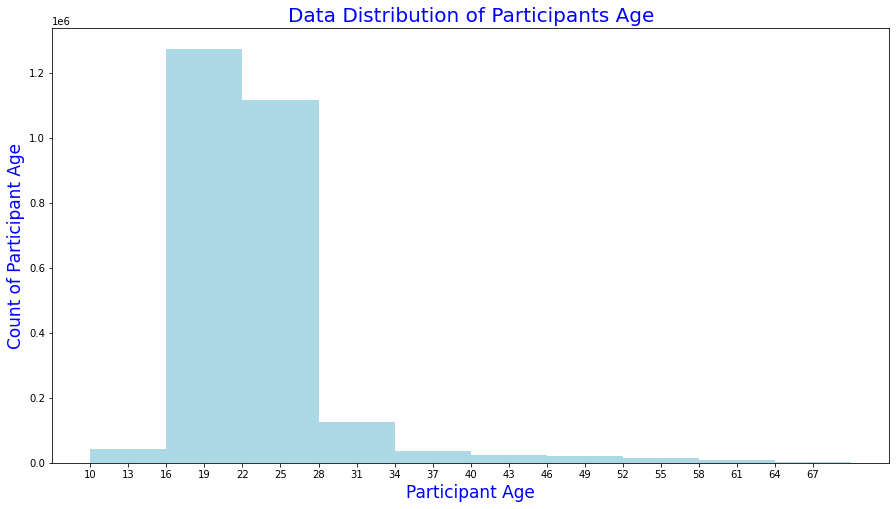

In [9]:
fig, axs = plt.subplots()
fig.set_size_inches([15, 8])


axs.hist(erasmus_df['Participant Age'],color="lightblue")

axs.set_title("Data Distribution of Participants Age", color="blue",fontsize=20)
axs.set_xticks([i for i in range(10,70,3)])
axs.set_xlabel("Participant Age", color="blue", fontsize=17)
axs.set_ylabel("Count of Participant Age", color="blue", fontsize=17)

plt.show()

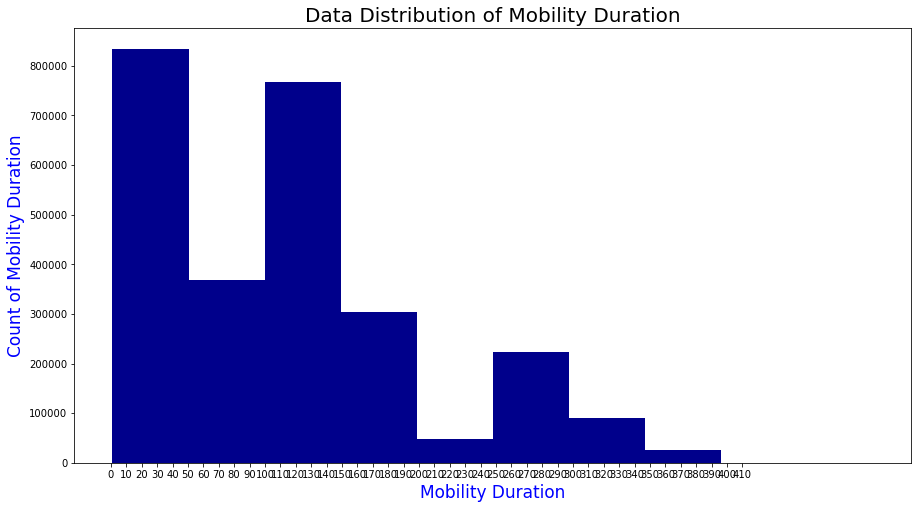

In [10]:
fig, axs = plt.subplots()
fig.set_size_inches([15, 8])


axs.hist(erasmus_df['Mobility Duration'],color="darkblue")

axs.set_title("Data Distribution of Mobility Duration", fontsize=20)
axs.set_xticks([i for i in range(0,420,10)])
axs.set_xlabel("Mobility Duration", color="blue", fontsize=17)
axs.set_ylabel("Count of Mobility Duration", color="blue", fontsize=17)

plt.show()

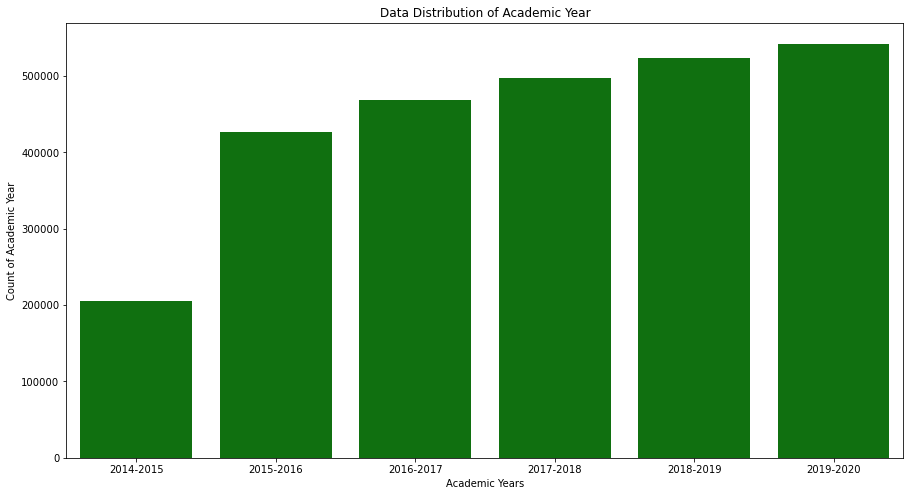

In [11]:
# Set-up the size and plots 
plt.figure(figsize=(15,8))

gfg = sns.countplot(x = "Academic Year", data=erasmus_df, color="green")
gfg.set(xlabel ="Academic Years", 
        ylabel = "Count of Academic Year", 
        title ='Data Distribution of Academic Year')

plt.show()

In [12]:
erasmus_df.groupby('Participant Nationality').count().sort_values(by='Academic Year',ascending=False).head().Participants.to_frame()

,Participants
Participant Nationality,
DE,321566
FR,321028
ES,280081
IT,271002
TR,136507


In [13]:
erasmus_df.groupby('Sending Country Code').count().sort_values(by='Academic Year',ascending=False).head().Participants.to_frame()

,Participants
Sending Country Code,
FR,332014
DE,326158
ES,286318
IT,273516
TR,137250


In [14]:
erasmus_df.groupby('Receiving Country Code').count().sort_values(by='Academic Year',ascending=False).head().Participants.to_frame()

,Participants
Receiving Country Code,
ES,368753
DE,261884
UK,243139
IT,224836
FR,203169


In [15]:
receivingCity = erasmus_df.groupby('Receiving City').count().sort_values(by='Academic Year',ascending=False).head().Participants.to_frame()
receivingCity

,Participants
Receiving City,
London,47870
Barcelona,43129
Madrid,41116
Berlin,38540
Paris,36045


In [16]:
erasmus_df.groupby('Sending City').count().sort_values(by='Academic Year',ascending=False).head().Participants.to_frame()

,Participants
Sending City,
Paris,35411
Madrid,34356
Berlin,28199
Istanbul,24576
Budapest,23229


In [17]:
receivingUni = erasmus_df.groupby('Receiving Organization').count().sort_values(by='Academic Year',ascending=False).head().Participants
receivingUni.to_frame()

,Participants
Receiving Organization,
Universitat De Valencia,11742
Alma Mater Studiorum - Universita Di Bologna,11685
Universidad De Granada,10834
Universidade De Lisboa,10756
Universidad Complutense De Madrid,9618


In [18]:
erasmus_df.groupby('Sending Organization').count().sort_values(by='Academic Year',ascending=False).head().Participants.to_frame()

,Participants
Sending Organization,
Alma Mater Studiorum - Universita Di Bologna,14744
Universidad De Granada,11599
Universita Degli Studi Di Padova,9960
Universita Degli Studi Di Roma La Sapienza,9453
Universidad Complutense De Madrid,9375


In [19]:
sending = erasmus_df['Sending Country Code'].value_counts().to_frame().reset_index()
receiving = erasmus_df['Receiving Country Code'].value_counts().to_frame().reset_index()

sending_receiving = sending.merge(receiving)
sending_receiving = sending_receiving.rename(columns = {"index":"Country",
                                                        "Sending Country Code":"Sending Amount",
                                                        "Receiving Country Code":"Receiving Amount"})
# Get only the bigest 10 country
sending_receiving = sending_receiving.head(10)

sending_receiving = sending_receiving.set_index('Country')
sending_receiving

,Sending Amount,Receiving Amount
Country,,
FR,332014,203169
DE,326158,261884
ES,286318,368753
IT,273516,224836
TR,137250,60850
PL,134009,139602
UK,123341,243139
NL,105044,91496
RO,78115,52915


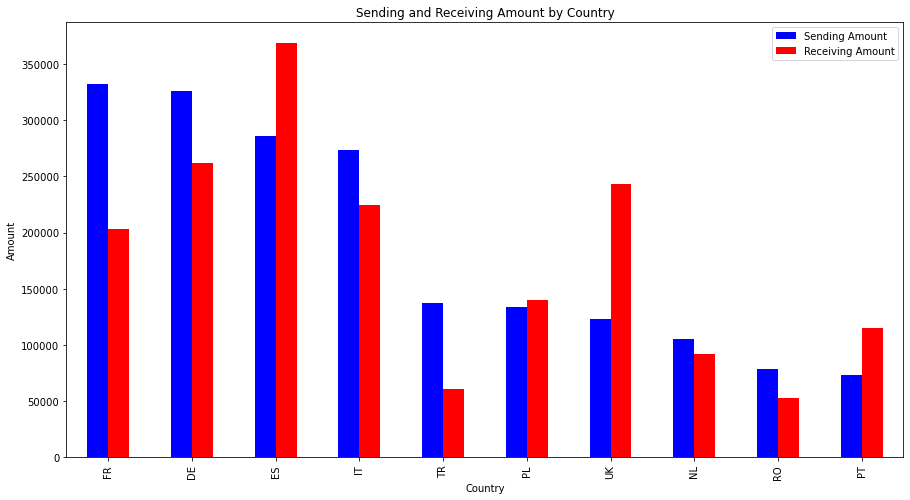

In [20]:
ax = sending_receiving.plot(kind='bar', figsize=(15, 8), rot=0,color=['Blue','Red'])
ax.set_title('Sending and Receiving Amount by Country')
ax.set_xlabel('Country')
ax.set_ylabel('Amount')
plt.xticks(rotation=90)
plt.show()

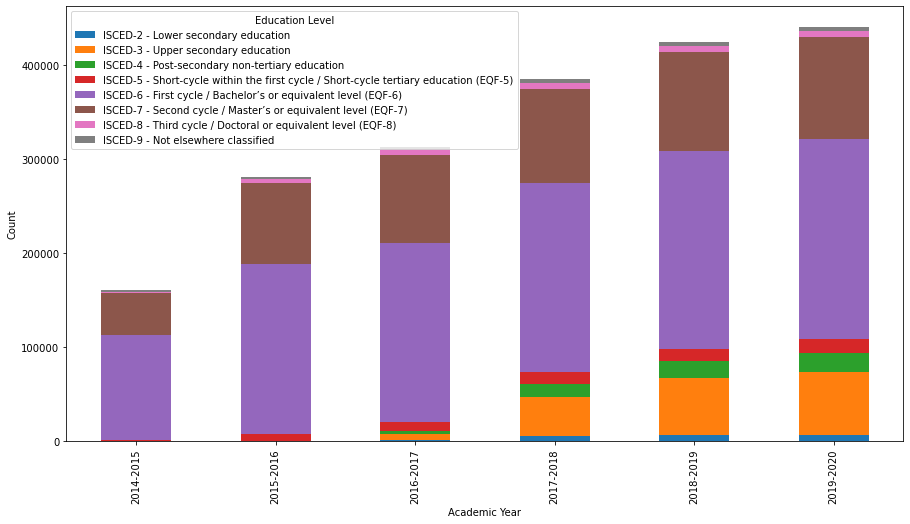

In [21]:
# group the dataframe by year and activity
grouped = erasmus_df[['Academic Year','Education Level']]
grouped = grouped[grouped['Education Level']!='Unknown']
grouped = grouped.groupby(['Academic Year', 'Education Level']).size().unstack(fill_value=0)

# create a stacked bar chart
fig, axs = plt.subplots(figsize=(15, 8))

grouped.plot(kind='bar', stacked=True, ax = axs)

# set the x-label and y-label
axs.set_xlabel('Academic Year')
axs.set_ylabel('Count')

# display the plot
plt.show()
grouped = None

Text(0.5, 1.0, 'Special Needs %')

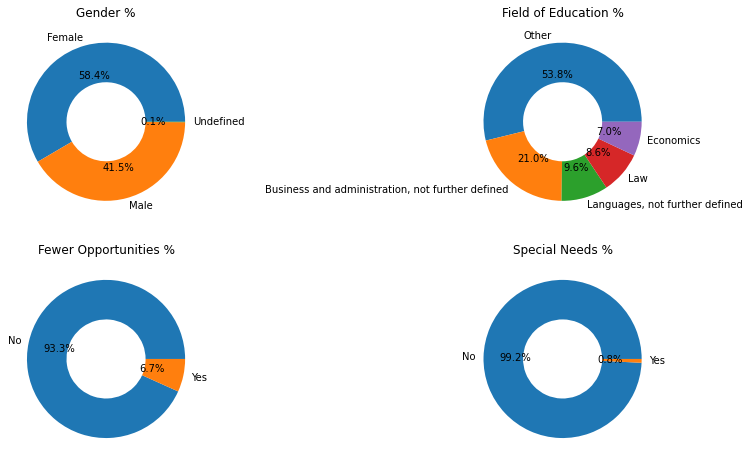

In [22]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches([15, 8])

# Gender 
gender = erasmus_df['Participant Gender'].value_counts()
axs[0, 0].pie(gender.values,
              labels = gender.index,
              wedgeprops=dict(width=0.5),
              autopct='%1.1f%%')
axs[0, 0].set_title('Gender %')

# Field of education
FieldofEducation = erasmus_df['Field of Education'].value_counts().head(5)
axs[0,1].pie(FieldofEducation.values,
              labels = FieldofEducation.index,
              wedgeprops=dict(width=0.5),
              autopct='%1.1f%%')
axs[0,1].set_title('Field of Education %')

# Fewer Opportunities
FewerOpportunities = erasmus_df['Fewer Opportunities'].value_counts()
axs[1,0].pie(FewerOpportunities.values,
              labels = FewerOpportunities.index,
              wedgeprops=dict(width=0.5),
              autopct='%1.1f%%')
axs[1,0].set_title('Fewer Opportunities %')

# Special Needs
SpecialNeeds = erasmus_df['Special Needs'].value_counts()
axs[1, 1].pie(SpecialNeeds.values,
              labels = SpecialNeeds.index,
              wedgeprops=dict(width=0.5),
              autopct='%1.1f%%')
axs[1, 1].set_title('Special Needs %')

### 2. Cost of living analysis

In [23]:
cof.sort_values(by='Net Salary',ascending=False)

,City,Country,Meal,McDo,Bread,Cheese,Bar Beer,Market Beer,Market Wine,Cappucino,Rice,Potatoes,Water,Cigarettes,One Ticket,Monthly Pass,Basics,Mobile,Internet,Cinema,Jeans,Apartment,Net Salary
4459,Bainbridge Island,United States,25.00,9.65,2.64,11.70,5.00,3.16,12.50,5.28,2.14,2.44,2.33,8.80,2.00,50.0,225.00,0.11,68.00,15.75,47.20,1500.00,9000.00
3049,Annapolis,United States,20.00,8.00,3.30,10.04,5.00,2.50,15.00,4.39,4.48,3.03,1.75,9.50,3.29,85.0,201.83,0.10,64.12,12.00,41.00,2375.00,8888.00
3633,Newport Beach,United States,20.00,8.00,2.54,10.83,9.00,3.57,16.00,4.18,2.10,3.17,2.25,8.00,1.50,95.0,90.00,0.22,51.00,12.00,48.00,3500.00,8466.00
3154,East Palo Alto,United States,17.50,8.00,4.67,13.23,7.00,1.21,13.00,4.47,4.20,3.74,2.25,9.25,2.50,90.0,172.50,0.16,55.15,13.00,55.44,2333.33,8346.00
3873,Des Plaines,United States,20.00,9.00,2.20,8.82,5.00,1.43,13.00,4.25,3.73,1.10,1.00,14.00,2.25,75.0,163.78,0.33,30.00,15.00,37.50,1550.00,8333.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4921,Richmond,Australia,NaN,NaN,2.72,7.88,NaN,NaN,NaN,NaN,2.55,2.38,0.54,20.39,3.40,NaN,84.02,NaN,57.76,14.27,61.16,2242.61,NaN
4934,La Ronge,Canada,NaN,8.89,1.85,9.63,4.45,NaN,11.49,2.22,5.93,4.44,0.93,11.49,NaN,NaN,188.99,NaN,50.03,9.45,33.35,592.92,NaN
4938,Seferhisar,Turkey,3.22,1.61,0.38,4.29,2.15,1.34,NaN,2.33,NaN,0.64,NaN,1.45,NaN,NaN,70.98,NaN,6.14,NaN,32.20,321.99,NaN
4943,Broome,Australia,16.99,8.83,1.05,6.73,7.99,5.66,8.15,3.40,0.95,2.72,1.12,23.50,3.74,NaN,202.17,NaN,50.97,12.40,57.76,815.50,NaN


In [24]:
# Get only the lines with apartment and salary not null
cofRatio = cof[cof['Net Salary'].isna()==False]
cofRatio['Ratio Sal/Apart'] = cofRatio['Apartment']/cofRatio['Net Salary']*100

# Take out corrupted values
cofRatio = cofRatio[(cofRatio['Ratio Sal/Apart']<100) & (cofRatio['Ratio Sal/Apart']>10)]

cofRatio.sort_values(by='Ratio Sal/Apart',ascending=True)

,City,Country,Meal,McDo,Bread,Cheese,Bar Beer,Market Beer,Market Wine,Cappucino,Rice,Potatoes,Water,Cigarettes,One Ticket,Monthly Pass,Basics,Mobile,Internet,Cinema,Jeans,Apartment,Net Salary,Ratio Sal/Apart
1005,Uijeongbu,South Korea,5.38,5.76,2.85,11.54,2.30,1.92,15.36,3.46,1.92,3.84,0.90,3.46,NaN,NaN,135.98,0.16,18.44,7.68,58.26,230.47,2304.69,10.000043
2396,Jendouba,Tunisia,0.62,1.55,0.08,5.42,0.62,0.43,2.32,0.67,0.25,0.46,0.15,1.24,0.05,2.48,23.70,0.03,18.59,3.41,13.94,46.47,463.25,10.031301
1121,Wuppertal,Germany,13.70,8.43,1.58,10.75,3.69,0.63,4.16,3.64,2.28,1.32,0.35,8.06,3.06,74.82,201.77,0.12,35.56,10.01,75.08,368.81,3628.40,10.164535
3220,Jekabpils,Latvia,7.90,5.27,1.03,7.90,2.11,1.05,5.27,2.11,0.95,0.53,0.63,4.16,1.05,22.49,149.28,0.00,18.97,7.06,43.20,105.37,1001.06,10.525843
4677,Udayagiri,India,2.46,4.30,0.47,4.61,1.84,2.05,8.60,2.01,0.66,0.45,0.36,3.87,0.61,NaN,24.64,0.01,9.29,2.70,35.31,67.55,614.09,11.000016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,Cairo,Egypt,4.07,4.07,0.52,3.28,1.63,1.29,8.14,1.75,0.73,0.34,0.22,2.03,0.28,13.23,26.53,0.01,16.37,4.48,39.37,196.83,200.40,98.218563
529,Monaco,Monaco,26.34,9.48,3.95,14.75,7.38,2.11,13.70,4.54,3.34,1.58,2.03,10.54,2.11,37.93,184.18,NaN,57.60,10.54,83.60,5490.31,5589.37,98.227707
620,Malang,Indonesia,1.30,3.11,0.97,6.15,2.48,1.94,10.21,0.89,0.75,0.71,0.36,1.94,0.32,3.89,43.75,0.10,23.77,2.27,31.76,205.26,207.42,98.958635
4097,Pontes e Lacerda,Brazil,NaN,NaN,NaN,2.30,NaN,1.92,5.75,NaN,2.11,2.87,0.57,2.87,NaN,NaN,133.24,NaN,18.97,NaN,17.22,229.91,232.21,99.009517


In [25]:
tempCity = list(receivingCity.index)
cofRatio[cofRatio['City'].isin(tempCity)]

,City,Country,Meal,McDo,Bread,Cheese,Bar Beer,Market Beer,Market Wine,Cappucino,Rice,Potatoes,Water,Cigarettes,One Ticket,Monthly Pass,Basics,Mobile,Internet,Cinema,Jeans,Apartment,Net Salary,Ratio Sal/Apart
28,London,United Kingdom,18.45,8.61,1.25,7.92,7.26,2.38,11.07,4.14,2.15,1.41,1.38,15.99,3.20,184.50,299.36,0.13,35.92,14.76,89.10,2417.07,4033.84,59.919828
32,Paris,France,15.81,10.54,2.11,17.51,7.38,2.11,8.43,3.89,2.29,2.30,0.85,11.06,2.00,79.03,199.44,0.18,31.36,13.17,103.86,1365.19,2752.34,49.601067
80,Madrid,Spain,12.64,8.43,1.09,10.67,3.69,1.03,5.27,2.23,1.22,1.21,0.72,5.27,1.58,57.48,166.08,0.18,38.10,9.48,77.06,1056.14,2089.54,50.544139
120,Barcelona,Spain,14.75,9.48,1.50,12.32,3.16,1.16,6.32,2.35,1.35,1.40,0.81,5.27,2.53,42.15,170.85,0.23,40.15,9.48,77.21,1083.72,1978.23,54.782305
144,Berlin,Germany,12.64,9.48,1.70,12.69,4.21,1.13,5.90,3.37,2.43,2.00,0.69,8.43,3.16,89.57,308.30,0.11,40.24,12.64,88.38,1321.90,3158.05,41.858109
1082,London,Canada,16.68,9.63,2.21,10.85,4.45,2.39,11.12,3.40,2.73,1.78,1.36,10.67,2.22,70.41,129.73,0.25,59.70,11.11,68.60,1348.08,3446.30,39.116734


In [31]:
# Per country
cofCountry = cof.groupby('Country').mean()
cofCountry.sort_values(by='McDo',ascending=True).head(20)

,Meal,McDo,Bread,Cheese,Bar Beer,Market Beer,Market Wine,Cappucino,Rice,Potatoes,Water,Cigarettes,One Ticket,Monthly Pass,Basics,Mobile,Internet,Cinema,Jeans,Apartment,Net Salary
Country,,,,,,,,,,,,,,,,,,,,,
Burkina Faso,0.800000,2.090000,1.030000,NaN,1.120000,0.920000,5.620000,1.610000,0.850000,1.690000,0.790000,1.610000,0.320000,14.460000,96.390000,0.270000,35.820000,2.010000,12.850000,401.610000,426.370000
Guinea-Bissau,2.620000,2.210000,0.240000,NaN,1.010000,0.880000,5.620000,2.410000,0.800000,0.760000,0.800000,1.610000,NaN,NaN,16.060000,0.180000,NaN,1.610000,88.350000,346.160000,1008.780000
Swaziland,3.115000,2.340000,0.590000,7.430000,0.975000,0.830000,4.510000,1.175000,1.280000,0.800000,0.630000,2.090000,1.140000,29.940000,92.190000,0.130000,54.355000,3.140000,54.320000,278.480000,532.250000
Cameroon,2.543333,2.610000,0.613333,17.093333,1.093333,1.015000,4.820000,1.050000,1.003333,1.285000,0.596667,1.631667,1.598000,8.035000,74.806667,0.128333,41.030000,6.423333,23.301667,104.521667,229.777500
Eritrea,11.400000,2.670000,0.500000,NaN,1.000000,1.000000,NaN,1.060000,1.870000,1.560000,1.580000,2.500000,0.220000,NaN,30.000000,0.100000,NaN,1.000000,30.000000,650.000000,1060.000000
Algeria,2.022857,2.763704,0.189259,5.213077,1.431250,1.390435,7.146522,0.511111,0.988966,0.514643,0.270690,2.121786,0.212308,8.880667,40.312692,0.064483,33.906667,4.454167,29.257778,145.281034,259.595769
Philippines,2.978246,2.777018,1.172037,5.895370,1.252778,1.105769,6.443333,2.174727,0.887018,1.567407,0.681250,2.553750,0.299767,12.210357,97.866429,0.142143,36.231228,4.742182,36.545714,263.838421,291.160638
Tunisia,1.750526,2.865789,0.109474,6.971176,1.056667,0.822353,3.951765,0.596316,0.693158,0.438947,0.231053,2.414444,0.225263,9.194118,33.038421,0.058889,18.660526,3.651111,27.816316,126.891053,287.027895
Uzbekistan,3.454286,2.920000,0.340000,3.950000,0.902857,0.896667,2.440000,1.360000,1.090000,0.490000,0.294286,1.960000,0.191429,11.421667,45.048333,0.018333,15.844286,2.570000,25.566667,222.907143,242.041429


In [48]:
import geopandas as gpd
import folium
from folium import plugins
#choropleth

#CartoDB Positon
#OpenStreetMap
map = folium.Map(location=[48.85,  2.29], tiles="OpenStreetMap", zoom_start=2)
map

### 3. University Ranking analysis

In [27]:
tempUni = list(receivingUni.index)
print("Top 5 receiving univerisities",tempUni)
tempUniFinal=[]
for u in tempUni: # Only get the city of the uni
    u = u.split(" ")
    tempUniFinal.append(u[-1])
print("Citites of thoses 5 univerisities",tempUniFinal)
rank2019[rank2019['name'].str.contains('|'.join(tempUniFinal))]

Top 5 receiving univerisities ['Universitat De Valencia', 'Alma Mater Studiorum - Universita Di Bologna', 'Universidad De Granada', 'Universidade De Lisboa', 'Universidad Complutense De Madrid']
Citites of thoses 5 univerisities ['Valencia', 'Bologna', 'Granada', 'Lisboa', 'Madrid']


,rank_order,rank,name,scores_overall,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,genderGap
179,1800,180,University of Bologna,54.7,51.2,32.6,82.7,43.9,49.2,Italy,"66,998",23.9,11%,57 : 43,14
355,3560,351–400,Autonomous University of Madrid,41.7–43.9,33.9,28.4,64.8,37.8,51.1,Spain,"29,532",13.4,14%,59 : 41,18
417,4180,401–500,Complutense University of Madrid,37.1–41.6,42.4,28.4,42.7,35.6,44.3,Spain,"64,466",20.1,14%,61 : 39,22
496,4970,401–500,University of Valencia,37.1–41.6,28.0,19.6,68.0,36.3,44.9,Spain,"50,927",16.7,11%,62 : 38,24
624,6250,601–800,Carlos III University of Madrid,26.0–33.4,26.4,16.0,37.3,37.8,58.6,Spain,"16,917",11.0,15%,43 : 57,-14
660,6610,601–800,University of Granada,26.0–33.4,23.5,19.0,48.3,35.0,47.0,Spain,"52,989",14.9,10%,57 : 43,14
740,7410,601–800,Polytechnic University of Valencia,26.0–33.4,25.4,12.0,45.2,44.5,47.5,Spain,"21,945",9.4,13%,38 : 62,-24
775,7760,601–800,Technical University of Madrid,26.0–33.4,31.1,13.9,37.9,42.6,47.5,Spain,"39,269",13.2,13%,32 : 68,-36


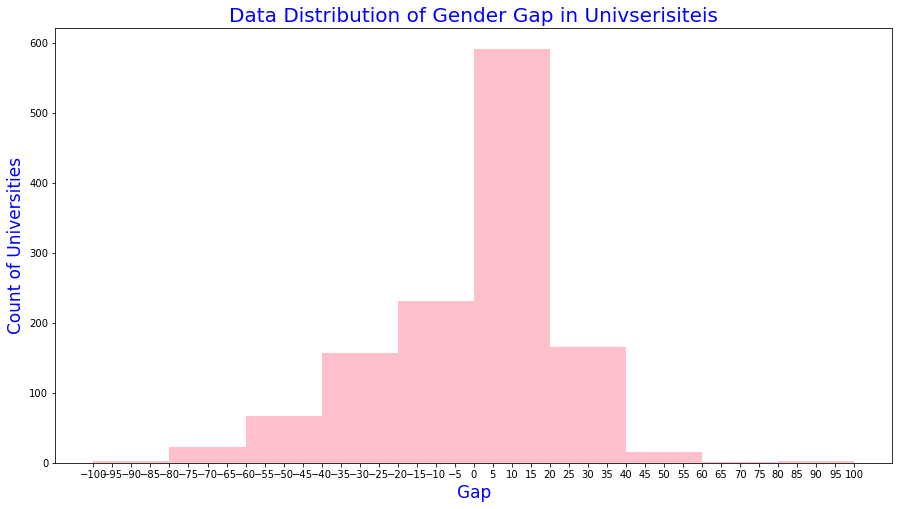

In [28]:
fig, axs = plt.subplots()
fig.set_size_inches([15, 8])

axs.hist(rank2019['genderGap'],color="pink")

axs.set_title("Data Distribution of Gender Gap in Univserisiteis", color="blue",fontsize=20)
axs.set_xticks([i for i in range(-100,105,5)])
axs.set_xlabel("Gap", color="blue", fontsize=17)
axs.set_ylabel("Count of Universities", color="blue", fontsize=17)

plt.show()

In [29]:
usUni = erasmus_df[erasmus_df['Receiving Country Code']=='US']
usUni = list(usUni['Receiving Organization'].unique())

tempUni = usUni
print("US Universities",tempUni)
tempUniFinal=[]
for u in tempUni: # Only get the city of the uni
    u = u.split(" ")
    tempUniFinal.append(u[-1])
print(tempUniFinal)
tempUniFinal2=[]
for i in tempUniFinal:
        if((i!='University') and (i!='College') and (i!='Institute')and (i!='School')and (i!='System')):
            tempUniFinal2.append(i)
print(tempUniFinal2)
print("Citites of thoses 5 univerisities",tempUniFinal2)
rank2019[rank2019['name'].str.contains('|'.join(tempUniFinal2))]


#bestUni = ['Oxford','Cambridge','Stanford','Massachusetts']

US Universities ['Troy University', 'School Of Visual Arts', 'San Diego State University Foundation', 'University Of Puerto Rico', 'Lenoir-Rhyne University', 'North Carolina State University', 'Nazareth College Of Rochester', 'Cleveland Institute Of Music', 'Manhattan School Of Music', 'University Of Michigan The Regents Of The University Of Michigan', 'University Of Houston System', 'Louisiana State University And Agricultural And Mechanical College', 'Mississippi State University', 'The Ohio State University', 'University Of Connecticut', 'Pacific Northwest College Of Art', 'Baylor University', 'Jonathan Shik', 'University Of Florida', 'The John Marshall Law School', 'Board Of Governors Of The Colorado State University System', 'Board Of Regents, Nevada System Of Higher Education, On Behalf Of University Of Nevada Las Vegas', 'Hampshire College', 'Valdosta State University', 'Regents Of The University Of Colorado', 'The Regents Of The University Of California', 'San Diego State Unive

,rank_order,rank,name,scores_overall,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,genderGap
3,40,4,Massachusetts Institute of Technology,94.2,91.9,92.7,99.9,87.6,89.0,United States,"11,231",8.7,34%,38 : 62,-24
4,50,5,California Institute of Technology,94.1,94.5,97.2,99.2,88.2,62.3,United States,"2,255",6.5,29%,33 : 67,-34
9,100,10,The University of Chicago,90.2,90.2,90.1,99.0,41.4,70.9,United States,"13,562",6.1,25%,44 : 56,-12
12,130,=12,University of Pennsylvania,89.0,87.4,89.2,98.4,70.3,63.6,United States,"20,443",6.4,20%,52 : 48,4
14,150,15,"University of California, Berkeley",87.7,78.7,92.3,99.7,49.3,69.8,United States,"36,468",13.2,17%,51 : 49,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,12130,1001+,SRM Institute of Science and Technology,9.8–18.9,14.2,7.8,14.0,34.2,16.4,India,"47,375",16.4,2%,21 : 79,-58
1214,12150,1001+,St Petersburg Electrotechnical University (LETI),9.8–18.9,18.8,10.4,19.5,57.6,26.2,Russian Federation,"8,418",13.1,12%,30 : 70,-40
1225,12260,1001+,TOBB University of Economics and Technology,9.8–18.9,15.2,10.9,27.1,34.7,25.4,Turkey,"5,474",16.5,1%,46 : 54,-8
1230,12310,1001+,Tokyo University of Marine Science and Technology,9.8–18.9,22.7,14.0,9.5,50.3,31.1,Japan,"2,686",11.0,7%,33 : 67,-34


<AxesSubplot:xlabel='location'>

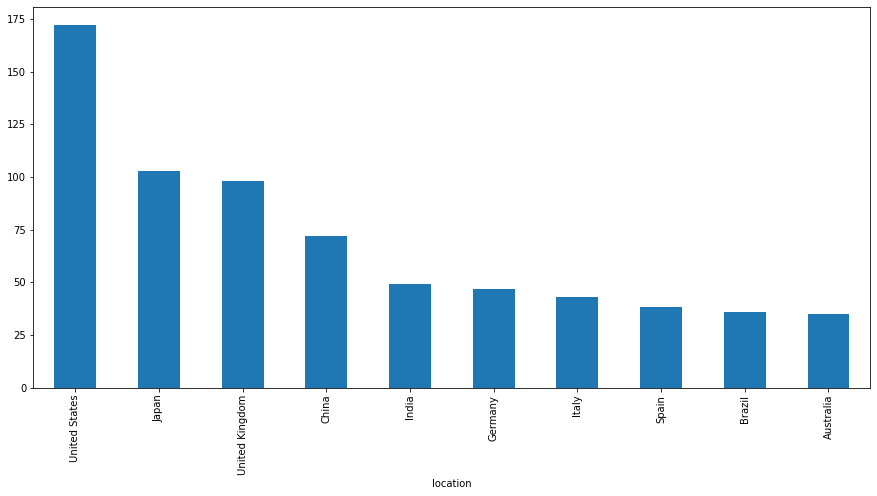

In [30]:
a=rank2019.groupby('location').count().sort_values(by='rank_order',ascending=False).head(10)
a['rank'].plot(kind='bar',figsize=(15,7))